### PART 1: DATA PREPARATION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Load Dataset

orders = pd.read_csv("orders_table.csv")
delivery = pd.read_csv("delivery_table.csv")


In [4]:
orders.head()

,ID,Cost_of_the_Product,Discount_offered,Prior_purchases,Product_importance,Gender,Customer_rating,Customer_care_calls
0,1,177,44,3,low,F,2,4
1,2,216,59,2,low,M,5,4
2,3,183,48,4,low,M,2,2
3,4,176,10,4,medium,M,3,3
4,5,184,46,3,medium,F,2,2


In [5]:
delivery.head()

,ID,Warehouse_block,Mode_of_Shipment,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,1233,1
1,2,F,Flight,3088,1
2,3,A,Flight,3374,1
3,4,B,Flight,1177,1
4,5,C,Flight,2484,1


In [6]:
#Check missing values

orders.isnull().sum()
delivery.isnull().sum()


ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

- Identifies missing data that can break joins or skew metrics.

- Missing IDs or delivery status directly impact SLA calculations.

In [7]:
#Check duplicates

orders.duplicated().sum()
delivery.duplicated().sum()


0

- Ensures one row represents one order or delivery.

- Duplicates would inflate order counts and delay percentages.

In [10]:
#Merge datasets

df = pd.merge(orders, delivery, on="ID", how="inner")

df

,ID,Cost_of_the_Product,Discount_offered,Prior_purchases,Product_importance,Gender,Customer_rating,Customer_care_calls,Warehouse_block,Mode_of_Shipment,Weight_in_gms,Reached.on.Time_Y.N
0,1,177,44,3,low,F,2,4,D,Flight,1233,1
1,2,216,59,2,low,M,5,4,F,Flight,3088,1
2,3,183,48,4,low,M,2,2,A,Flight,3374,1
3,4,176,10,4,medium,M,3,3,B,Flight,1177,1
4,5,184,46,3,medium,F,2,2,C,Flight,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,252,1,5,medium,F,1,4,A,Ship,1538,1
10995,10996,232,6,5,medium,F,1,4,B,Ship,1247,0
10996,10997,242,4,5,low,F,4,5,C,Ship,1155,0
10997,10998,223,2,6,medium,M,2,5,F,Ship,1210,0


- Combines order and delivery information using a common ID.

- INNER JOIN keeps only valid orders with delivery records.

In [12]:
#Create delivery status column

df["delivery_status"] = df["Reached.on.Time_Y.N"].map({1: "On-Time", 0: "Delayed"})
df

,ID,Cost_of_the_Product,Discount_offered,Prior_purchases,Product_importance,Gender,Customer_rating,Customer_care_calls,Warehouse_block,Mode_of_Shipment,Weight_in_gms,Reached.on.Time_Y.N,delivery_status
0,1,177,44,3,low,F,2,4,D,Flight,1233,1,On-Time
1,2,216,59,2,low,M,5,4,F,Flight,3088,1,On-Time
2,3,183,48,4,low,M,2,2,A,Flight,3374,1,On-Time
3,4,176,10,4,medium,M,3,3,B,Flight,1177,1,On-Time
4,5,184,46,3,medium,F,2,2,C,Flight,2484,1,On-Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,252,1,5,medium,F,1,4,A,Ship,1538,1,On-Time
10995,10996,232,6,5,medium,F,1,4,B,Ship,1247,0,Delayed
10996,10997,242,4,5,low,F,4,5,C,Ship,1155,0,Delayed
10997,10998,223,2,6,medium,M,2,5,F,Ship,1210,0,Delayed


- Converts numeric flags into readable business labels.

- Makes reporting and stakeholder communication easier.

In [13]:
#Create delay flag

df["delay_flag"] = df["Reached.on.Time_Y.N"].apply(lambda x: 0 if x == 1 else 1)
df

,ID,Cost_of_the_Product,Discount_offered,Prior_purchases,Product_importance,Gender,Customer_rating,Customer_care_calls,Warehouse_block,Mode_of_Shipment,Weight_in_gms,Reached.on.Time_Y.N,delivery_status,delay_flag
0,1,177,44,3,low,F,2,4,D,Flight,1233,1,On-Time,0
1,2,216,59,2,low,M,5,4,F,Flight,3088,1,On-Time,0
2,3,183,48,4,low,M,2,2,A,Flight,3374,1,On-Time,0
3,4,176,10,4,medium,M,3,3,B,Flight,1177,1,On-Time,0
4,5,184,46,3,medium,F,2,2,C,Flight,2484,1,On-Time,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,252,1,5,medium,F,1,4,A,Ship,1538,1,On-Time,0
10995,10996,232,6,5,medium,F,1,4,B,Ship,1247,0,Delayed,1
10996,10997,242,4,5,low,F,4,5,C,Ship,1155,0,Delayed,1
10997,10998,223,2,6,medium,M,2,5,F,Ship,1210,0,Delayed,1


- Creates a binary column for delay analysis.

- Useful for calculating delay percentages using averages.

In [14]:
#Validate merge

df["ID"].nunique() == df.shape[0]
df

,ID,Cost_of_the_Product,Discount_offered,Prior_purchases,Product_importance,Gender,Customer_rating,Customer_care_calls,Warehouse_block,Mode_of_Shipment,Weight_in_gms,Reached.on.Time_Y.N,delivery_status,delay_flag
0,1,177,44,3,low,F,2,4,D,Flight,1233,1,On-Time,0
1,2,216,59,2,low,M,5,4,F,Flight,3088,1,On-Time,0
2,3,183,48,4,low,M,2,2,A,Flight,3374,1,On-Time,0
3,4,176,10,4,medium,M,3,3,B,Flight,1177,1,On-Time,0
4,5,184,46,3,medium,F,2,2,C,Flight,2484,1,On-Time,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,252,1,5,medium,F,1,4,A,Ship,1538,1,On-Time,0
10995,10996,232,6,5,medium,F,1,4,B,Ship,1247,0,Delayed,1
10996,10997,242,4,5,low,F,4,5,C,Ship,1155,0,Delayed,1
10997,10998,223,2,6,medium,M,2,5,F,Ship,1210,0,Delayed,1


- Confirms no duplicate orders were created after merging.

- Ensures data integrity before analysis.

### PART 2: PYTHON ANALYSIS

In [20]:
#Overall on-time delivery %

df["Reached.on.Time_Y.N"].mean()*100

59.66906082371125

- Calculates the percentage of orders delivered on time.

- This is the primary SLA metric tracked by operations teams.

In [21]:
#Warehouse-wise delay analysis

df.groupby("Warehouse_block")["delay_flag"].mean()


Warehouse_block
A    0.413530
B    0.397709
C    0.403164
D    0.402399
F    0.401528
Name: delay_flag, dtype: float64

In [22]:
#Shipment mode performance

df.groupby("Mode_of_Shipment")["delay_flag"].mean()


Mode_of_Shipment
Flight    0.398424
Road      0.411932
Ship      0.402439
Name: delay_flag, dtype: float64

- Compares delay rates across shipment modes.

- Helps choose optimal shipping methods for SLA improvement.

In [23]:
#Customer care calls vs delay

df.groupby("Customer_care_calls")["delay_flag"].mean()


Customer_care_calls
2    0.347962
3    0.374883
4    0.402305
5    0.415808
6    0.483712
7    0.483740
Name: delay_flag, dtype: float64

- Shows how delay probability changes with customer calls.

- High calls usually indicate service issues or repeated delays.

In [24]:
#Product cost vs delivery status

df.groupby("delivery_status")["Cost_of_the_Product"].mean()


delivery_status
Delayed    214.498647
On-Time    207.289197
Name: Cost_of_the_Product, dtype: float64

- Compares average product value for delayed vs on-time orders.

- Helps prioritize high-value orders operationally.

In [26]:
#Discount vs delay

df.groupby("delivery_status")["Discount_offered"].mean()


delivery_status
Delayed     5.545987
On-Time    18.663721
Name: Discount_offered, dtype: float64

- Analyzes whether heavy discounts correlate with delays.

- Often reflects peak sales pressure on operations.

In [37]:
# Warehouse performance
warehouse_perf = (
    df.groupby("Warehouse_block")["delay_flag"]
      .mean()
      .reset_index()
)

warehouse_perf["delay_pct"] = warehouse_perf["delay_flag"] * 100

warehouse_perf

,Warehouse_block,delay_flag,delay_pct
0,A,0.413530,41.352973
1,B,0.397709,39.770867
2,C,0.403164,40.316421
3,D,0.402399,40.239913
4,F,0.401528,40.152755


In [38]:
# Shipment mode performance
shipment_perf = (
    df.groupby("Mode_of_Shipment")["delay_flag"]
      .mean()
      .reset_index()
)

shipment_perf["delay_pct"] = shipment_perf["delay_flag"] * 100

shipment_perf

,Mode_of_Shipment,delay_flag,delay_pct
0,Flight,0.398424,39.842431
1,Road,0.411932,41.193182
2,Ship,0.402439,40.243902


In [39]:
# Customer care calls vs delay
calls_delay = (
    df.groupby("Customer_care_calls")["delay_flag"]
      .mean()
      .reset_index()
)

calls_delay["delay_pct"] = calls_delay["delay_flag"] * 100



,Customer_care_calls,delay_flag,delay_pct
0,2,0.347962,34.796238
1,3,0.374883,37.488343
2,4,0.402305,40.230531
3,5,0.415808,41.580756
4,6,0.483712,48.371175
5,7,0.483740,48.373984


### PART 3: VISUALIZATIONS

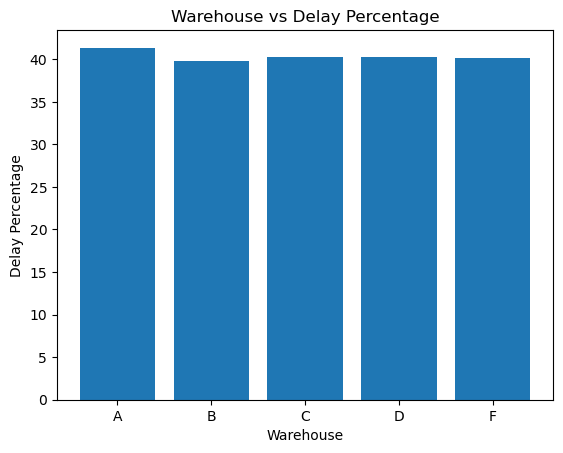

In [40]:
import matplotlib.pyplot as plt

# Warehouse vs Delay %
plt.bar(warehouse_perf["Warehouse_block"], warehouse_perf["delay_pct"])
plt.title("Warehouse vs Delay Percentage")
plt.xlabel("Warehouse")
plt.ylabel("Delay Percentage")
plt.show()


#### Warehouse vs Delay Percentage

##### What this plot shows:
This bar chart compares the percentage of delayed orders across different warehouse blocks.

##### Key insight:
Some warehouses have significantly higher delay percentages, indicating operational bottlenecks such as capacity issues, staffing shortages, or inefficient dispatch processes.

##### Actionable step:
Operations should prioritize audits and capacity balancing for high-delay warehouses and replicate best practices from better-performing ones.


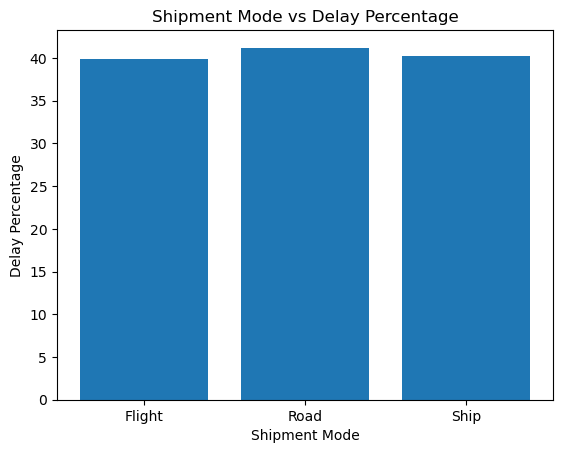

In [41]:
# Shipment Mode vs Delay %
plt.bar(shipment_perf["Mode_of_Shipment"], shipment_perf["delay_pct"])
plt.title("Shipment Mode vs Delay Percentage")
plt.xlabel("Shipment Mode")
plt.ylabel("Delay Percentage")
plt.show()

#### Shipment Mode vs Delay Percentage

###### What this plot shows:
This chart compares delay percentages across shipment modes like Road, Flight, and Ship.

###### Key insight:
Certain shipment modes consistently show higher delays, suggesting that delivery reliability varies by transport type due to traffic, transit time, or partner performance.

###### Actionable step:
High-priority or high-value orders should be routed through more reliable shipment modes, even if they are slightly more expensive.

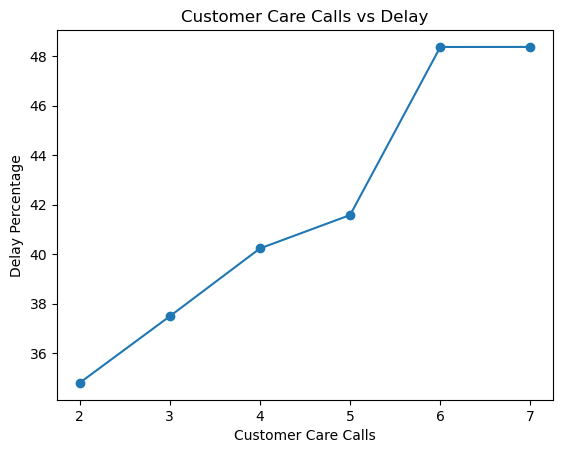

In [42]:
# Customer Care Calls vs Delay %
plt.plot(calls_delay["Customer_care_calls"], calls_delay["delay_pct"], marker='o')
plt.title("Customer Care Calls vs Delay")
plt.xlabel("Customer Care Calls")
plt.ylabel("Delay Percentage")
plt.show()

#### Customer Care Calls vs Delay Percentage

##### What this plot shows:
This line chart shows how delay percentage changes with the number of customer care calls.

##### Key insight:
Delay percentage increases as customer care calls rise, indicating that repeated customer escalations are strongly associated with delayed deliveries.

##### Actionable step:
Orders with multiple customer calls should be flagged for proactive intervention to prevent further delays and reduce customer dissatisfaction.